In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv("../raw-dataset/merged.csv", usecols=[1, 2])

df.head()

,domain,class
0,google.com,0
1,youtube.com,0
2,baidu.com,0
3,zhihu.com,0
4,taobao.com,0


In [2]:
df['length'] = df['domain'].apply(lambda x: len(x))

In [3]:
df['nb_hyphen'] = df['domain'].apply(lambda x: x.count("-"))

In [4]:
df['nb_subdomains'] = df['domain'].apply(lambda x: x.count(".") - 1)

In [15]:
df['nb_cdn'] = df['domain'].apply(lambda x: x.count("cdn"))

In [16]:
def count_digits(string):
    occurence = 0
    for char in string:
        if char.isdigit() == True:
            occurence += 1
    return occurence

df['nb_digits'] = df['domain'].apply(count_digits)

In [17]:
df['nb_www'] = df['domain'].apply(lambda x: x.count("www"))

In [18]:
def count_adword(string):
    occurence = 0
    
    if "ads" in string:
        occurence += 1
    elif "ad" in string:
        occurence += 1
    
    if "tracker" in string:
        occurence += 1
    
    return occurence

df['nb_adword'] = df['domain'].apply(count_adword)

In [19]:
def len_subdomain(string):
    subdomains = string.split(".")[:-2]
    return len(''.join(subdomains))

df["len_subomain"] = df['domain'].apply(len_subdomain)

In [20]:
def count_digits_subdomain(string):
    subdomains = string.split(".")[:-2]
    subdomain = ''.join(subdomains)
    return count_digits(subdomain)

df["nb_digits_subdomain"] = df['domain'].apply(count_digits_subdomain)

In [ ]:
df["is_net"] = df['domain'].apply(count_digits_subdomain)

In [29]:
def plot_graph(columns):
    
    graph_data = {}
    
    for column in columns:
        graph_data[column] = [adservices[column].mean() , non_adservice[column].mean()]

    adservices_count = [graph_data[x][0] for x in graph_data]
    non_adservice_count = [graph_data[x][1] for x in graph_data]
    
    x = np.arange(len(columns)) 
    width = 0.35 

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, adservices_count, width, label='Phishing')
    rects2 = ax.bar(x + width/2, non_adservice_count, width, label='Legitimate')

    ax.set_ylabel('Count')
    ax.set_title('Features in dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend()

    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    plt.show()   

In [25]:
df.columns

Index(['domain', 'class', 'length', 'nb_hyphen', 'nb_subdomains', 'nb_digits',
       'nb_www', 'nb_adword', 'len_subomain', 'nb_digits_subdomain', 'nb_cdn'],
      dtype='object')

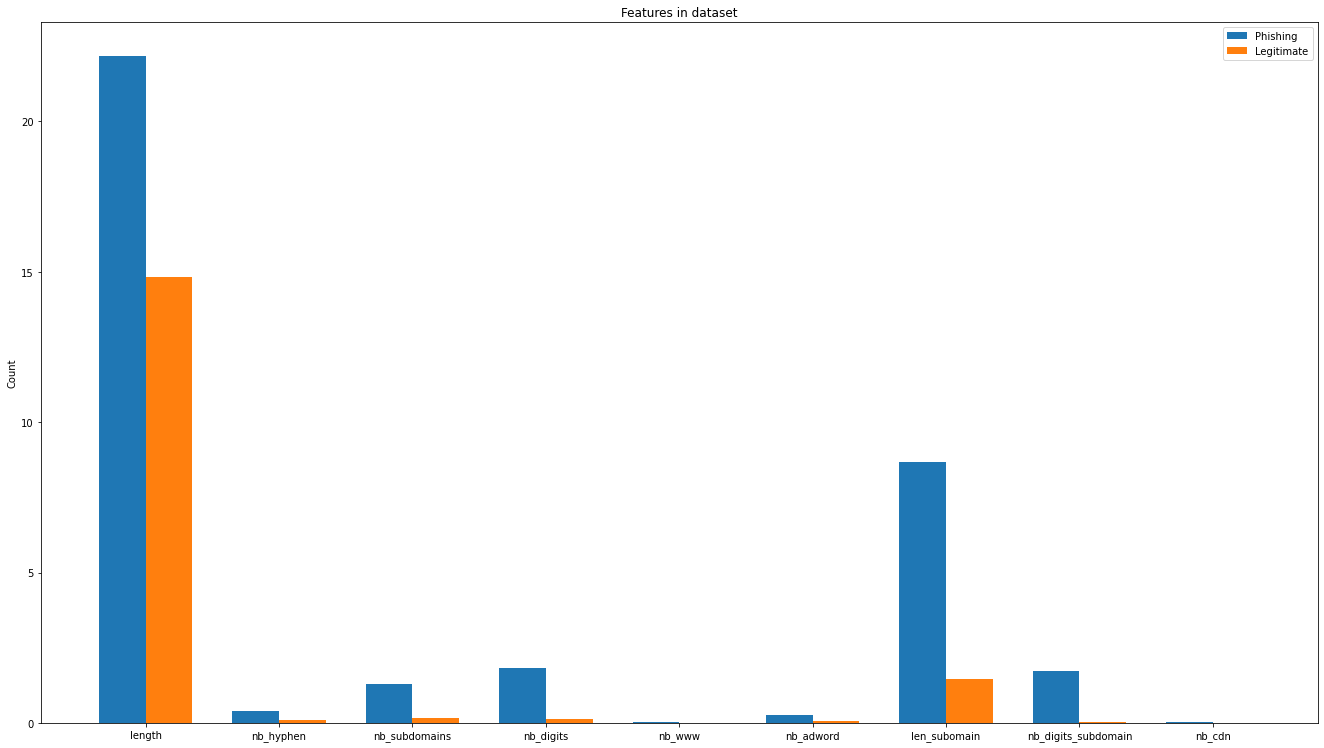

In [23]:
adservices = df[df['class'] == 1]
non_adservice = df[df['class'] == 0]

plot_graph(df.columns[2:])

In [13]:
adservices.head()

,domain,class,length,nb_hyphen,nb_subdomains,nb_digits,nb_www,nb_adword,len_subomain,nb_digits_subdomain
581685,0001-cab8-4c8c-43de.reporo.net,1,30,3,1,9,0,0,19,9
581686,002-slq-470.mktoresp.com,1,24,2,1,6,0,0,11,6
581687,004-btr-463.mktoresp.com,1,24,2,1,6,0,0,11,6
581688,005.free-counters.co.uk,1,23,1,2,3,0,0,16,3
581689,006.free-counters.co.uk,1,23,1,2,3,0,0,16,3


In [14]:
from tld import get_tld

ad_tld = pd.DataFrame()
normal_tld = pd.DataFrame()

ad_tld["tld"] = adservices["domain"].apply(lambda x: get_tld(x, fix_protocol=True))
normal_tld["tld"] = non_adservice["domain"].apply(lambda x: get_tld(x, fix_protocol=True))

In [28]:
df.drop(["domain"], axis=1).to_csv("../raw-dataset/feature-extracted.csv")

In [27]:
df

,domain,class,length,nb_hyphen,nb_subdomains,nb_digits,nb_www,nb_adword,len_subomain,nb_digits_subdomain,nb_cdn
0,google.com,0,10,0,0,0,0,0,0,0,0
1,youtube.com,0,11,0,0,0,0,0,0,0,0
2,baidu.com,0,9,0,0,0,0,0,0,0,0
3,zhihu.com,0,9,0,0,0,0,0,0,0,0
4,taobao.com,0,10,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
627909,yume.com,1,8,0,0,0,0,0,0,0,0
627910,zde-affinity.edgecaching.net,1,28,1,1,0,0,0,12,0,0
627911,zeepmedia.com,1,13,0,0,0,0,0,0,0,0
627912,zintext.com,1,11,0,0,0,0,0,0,0,0
